In [1]:
import pandas as pd
import numpy as np

In [2]:
def describe (table):
    for i in table.columns:
        print(i, '\n')
        print(table[i].isnull().count(), '\n')
        print(table[i].describe(), '\n')

In [3]:
covidCase = pd.read_csv('./covid_19_/Case.csv')
covidCase.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,서울,용산구,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,서울,관악구,True,Richway,119,37.48208,126.901384
2,1000003,서울,구로구,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,서울,양천구,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,서울,도봉구,True,Day Care Center,43,37.679422,127.044374


In [4]:
covidCase.columns

Index([' case_id', 'province', 'city', 'group', 'infection_case', 'confirmed',
       'latitude', 'longitude'],
      dtype='object')

In [5]:
covidPatientInfo = pd.read_csv('./covid_19_/PatientInfo.csv')
covidPatientInfo.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,서울,강서구,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,서울,중랑구,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,서울,종로구,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,서울,마포구,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,서울,성북구,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [6]:
covidPolicy = pd.read_csv('./covid_19_/Policy.csv')
covidPolicy.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [7]:
covidRegion = pd.read_csv('./covid_19_/Region.csv')
covidRegion.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,서울,서울,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,서울,강남구,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,서울,강동구,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,서울,강북구,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,서울,강서구,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [8]:
covidTime = pd.read_csv('./covid_19_/Time.csv')
covidTime.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [9]:
covidAge = pd.read_csv('./covid_19_/TimeAge.csv')
covidAge.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [10]:
covidTimeGender = pd.read_csv('./covid_19_/TimeGender.csv')
covidTimeGender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [11]:
covidTimeProvince = pd.read_csv('./covid_19_/TimeProvince.csv')
covidTimeProvince.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,서울,0,0,0
1,2020-01-20,16,부산,0,0,0
2,2020-01-20,16,대구,0,0,0
3,2020-01-20,16,인천,1,0,0
4,2020-01-20,16,광주,0,0,0


위 데이터들의 칼럼들을 보니 여기서 알아낼 수 있는 것은 어떤 지역에 노인 인구 밀집도를 나타내는 것은 covidRegion 데이터 밖에 없음을 알 수 있었다. 따라서 covidRegion데이터를 전처리 해보자
1. city와 elderly_population_ratio 열들을 선택
2. matplotlib을 사용하여 그래프로 나타냄

In [23]:
elderly_data = covidRegion.loc[:, ['city', 'elderly_population_ratio']]
elderly_data.head(10)

,city,elderly_population_ratio
0,서울,15.38
1,강남구,13.17
2,강동구,14.55
3,강북구,19.49
4,강서구,14.39
5,관악구,15.12
6,광진구,13.75
7,구로구,16.21
8,금천구,16.15
9,노원구,15.40


In [30]:
elderincrease = elderly_data.sort_values(by=['elderly_population_ratio'], axis=0, ascending=True)
elderincrease.head()

,city,elderly_population_ratio
78,북구,7.69
113,화성시,8.58
96,시흥시,8.86
73,유성구,9.04
203,구미시,9.08


In [42]:
import matplotlib
import matplotlib.pyplot as plt

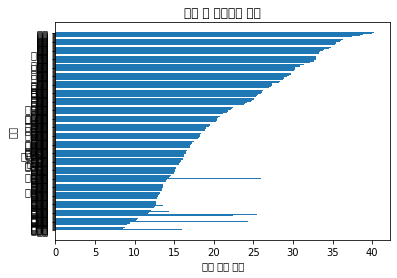

In [44]:
plt.figure()
plt.barh(elderincrease['city'], elderincrease['elderly_population_ratio'])
plt.xlabel('노인 인구 비율')
plt.ylabel('도시')
plt.title('지역 별 노인인구 비율')
plt.show()